In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [3]:
#Loading the dataset
data= pd.read_excel("sebokeng_data spreadsheet.xlsx")

In [4]:
print(data)

      sebSO2  sebNO2      sebO3  sebPM25  sebPM10
0        NaN     NaN        NaN      NaN      NaN
1        NaN     NaN        NaN      NaN      NaN
2        NaN     NaN        NaN      NaN      NaN
3        NaN     NaN        NaN      NaN      NaN
4        NaN     NaN        NaN      NaN      NaN
...      ...     ...        ...      ...      ...
3340     NaN     NaN        NaN      NaN      NaN
3341     NaN     NaN        NaN      NaN      NaN
3342     NaN     NaN        NaN      NaN      NaN
3343     NaN     NaN  23.932000      NaN      NaN
3344     NaN     NaN  22.543857      NaN      NaN

[3345 rows x 5 columns]


In [5]:
#To get the number of rows and columns
data.shape

(3345, 5)

In [6]:
data.count()

sebSO2     1925
sebNO2     2055
sebO3      2371
sebPM25    1853
sebPM10    1827
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sebSO2   1925 non-null   float64
 1   sebNO2   2055 non-null   float64
 2   sebO3    2371 non-null   float64
 3   sebPM25  1853 non-null   float64
 4   sebPM10  1827 non-null   float64
dtypes: float64(5)
memory usage: 130.8 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sebSO2,1925.0,13.877048,11.669311,0.190387,6.187676,10.360277,17.229557,115.727693
sebNO2,2055.0,25.350595,10.510577,0.000000,18.360628,23.416105,30.367969,115.438737
sebO3,2371.0,55.590021,24.103645,0.000000,37.442500,53.699667,71.014333,199.584250
sebPM25,1853.0,31.673353,18.867618,3.634714,19.661917,27.742417,38.294458,288.647042
sebPM10,1827.0,46.370742,24.009341,2.460333,30.136500,41.075083,56.197313,194.949870


In [9]:
#Determining the rows with missing values
data[data.isna().any(axis=1)]

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3340,NaN,NaN,NaN,NaN,NaN
3341,NaN,NaN,NaN,NaN,NaN
3342,NaN,NaN,NaN,NaN,NaN
3343,NaN,NaN,23.932000,NaN,NaN


In [10]:
#Remove empty rows 
data_clean=data.dropna(how='all')
data_clean


,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
10,NaN,NaN,53.279000,NaN,NaN
11,12.757653,20.591640,49.440750,71.006958,NaN
12,15.414879,25.047945,55.257417,56.674708,52.925478
13,4.040258,18.503978,46.795583,102.502417,92.675087
14,NaN,NaN,38.219000,NaN,NaN
...,...,...,...,...,...
3334,NaN,NaN,52.204000,NaN,NaN
3335,6.782962,19.502023,50.220000,NaN,NaN
3336,5.431988,27.101976,48.968000,NaN,NaN
3343,NaN,NaN,23.932000,NaN,NaN


In [11]:
#Descriptive Statistics
desc_stat=data_clean.describe()
desc_stat

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
count,1925.000000,2055.000000,2371.000000,1853.000000,1827.000000
mean,13.877048,25.350595,55.590021,31.673353,46.370742
std,11.669311,10.510577,24.103645,18.867618,24.009341
min,0.190387,0.000000,0.000000,3.634714,2.460333
25%,6.187676,18.360628,37.442500,19.661917,30.136500
50%,10.360277,23.416105,53.699667,27.742417,41.075083
75%,17.229557,30.367969,71.014333,38.294458,56.197313
max,115.727693,115.438737,199.584250,288.647042,194.949870


In [12]:
#Percentage of Missing data
Missing= data_clean.isna().mean()*100
Missing

sebSO2     20.091324
sebNO2     14.694894
sebO3       1.577418
sebPM25    23.080116
sebPM10    24.159402
dtype: float64

In [13]:
#Checking the number of rows and columns after removing the empty rows
data_clean.shape

(2409, 5)

In [14]:
#Checking for correlation between the variables
data_clean_matrix=data_clean.corr()
data_clean_matrix

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
sebSO2,1.000000,0.542145,-0.245870,0.269773,0.340847
sebNO2,0.542145,1.000000,-0.295839,0.540474,0.550825
sebO3,-0.245870,-0.295839,1.000000,-0.173370,-0.094339
sebPM25,0.269773,0.540474,-0.173370,1.000000,0.707248
sebPM10,0.340847,0.550825,-0.094339,0.707248,1.000000


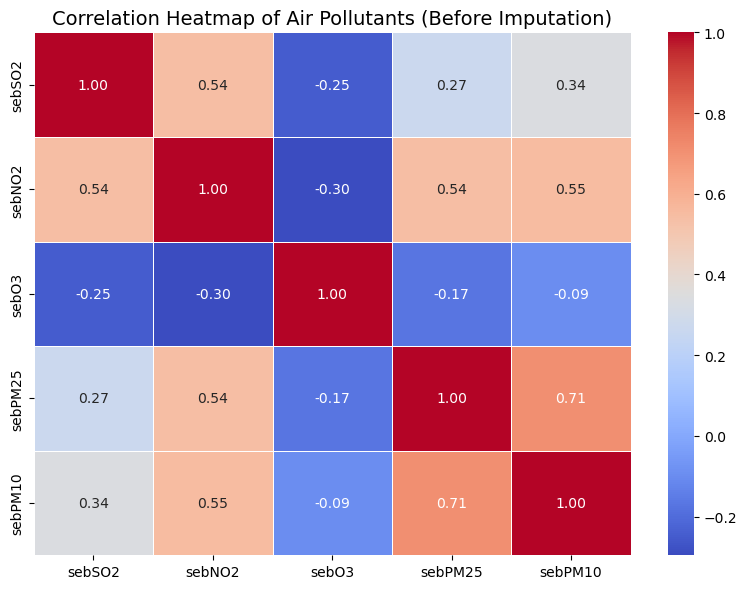

In [15]:
#Plot heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(data_clean_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Pollutants (Before Imputation)", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)  # Save image for report
plt.show()

Imputation of Missing Data

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [17]:
#Save column names and original index
cols= data_clean.columns
index= data_clean.index

In [18]:
#Instantiate the MICE imputer with the desired parameters
imputer= IterativeImputer (max_iter=10, random_state=0)

In [19]:
#Fit the imputer on the data and transform it to obtain the imputed values
imputed_values= imputer.fit_transform(data_clean)

In [20]:
#Convert back to Dataframe
data_imputed= pd.DataFrame(imputed_values, columns=cols, index=index)

In [21]:
# Create date range from 2011-01-01 to 2020-02-01
data_clean.index= pd.date_range(start='2011-01-01', periods=len(data_clean), freq="D")
data_imputed.index= pd.date_range(start='2011-01-01', periods=len(data_clean), freq="D")

BEFORE IMPUTATION:

In [22]:
data_clean.head()

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
2011-01-01,NaN,NaN,53.279000,NaN,NaN
2011-01-02,12.757653,20.591640,49.440750,71.006958,NaN
2011-01-03,15.414879,25.047945,55.257417,56.674708,52.925478
2011-01-04,4.040258,18.503978,46.795583,102.502417,92.675087
2011-01-05,NaN,NaN,38.219000,NaN,NaN


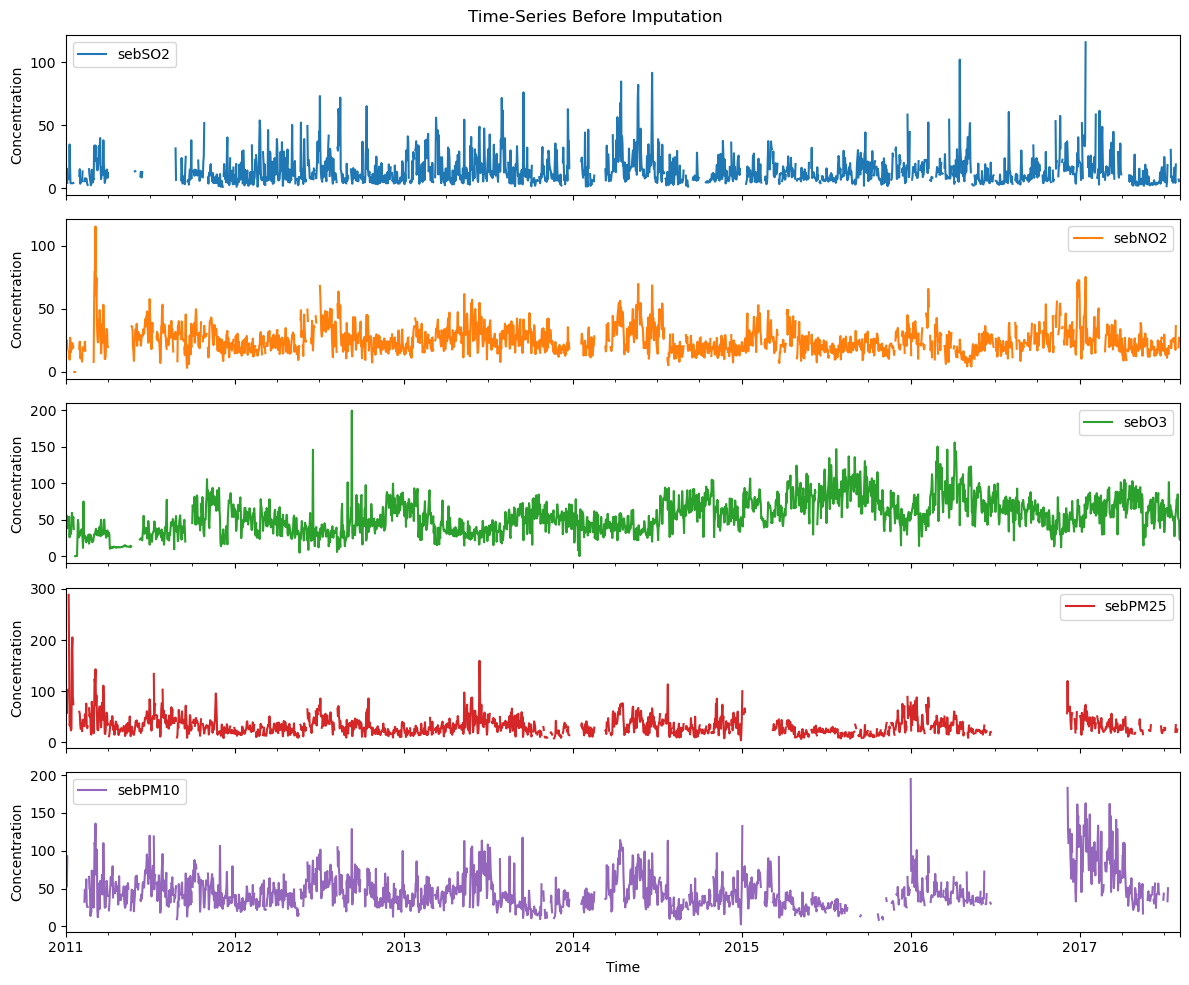

In [23]:
#Plot before Imputation
data_clean.plot(subplots=True, figsize=(12,10), title="Time-Series Before Imputation", ylabel="Concentration")
plt.xlabel("Time")
plt.tight_layout()
plt.savefig("before_imputation.png")
plt.show()

AFTER IMPUTATION:

In [24]:
data_imputed.head()

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
2011-01-01,14.285436,25.855835,53.279000,32.127364,46.425548
2011-01-02,12.757653,20.591640,49.440750,71.006958,79.615543
2011-01-03,15.414879,25.047945,55.257417,56.674708,52.925478
2011-01-04,4.040258,18.503978,46.795583,102.502417,92.675087
2011-01-05,16.126425,27.829436,38.219000,34.051190,47.985444


In [25]:
#Checking for missing values in the imputed data
data_imputed.isna().sum()

sebSO2     0
sebNO2     0
sebO3      0
sebPM25    0
sebPM10    0
dtype: int64

In [26]:
#Checking for negative values
negatives = (data_imputed < 0).sum()
print(negatives)

sebSO2     3
sebNO2     0
sebO3      0
sebPM25    0
sebPM10    0
dtype: int64


In [27]:
data_imputed.columns

Index(['sebSO2', 'sebNO2', 'sebO3', 'sebPM25', 'sebPM10'], dtype='object')

In [28]:
#Sorting out the negative values in sebSO2
data_imputed["sebSO2"] = data_imputed["sebSO2"].fillna(data_imputed["sebSO2"].median())


In [29]:
#Checking whether negative values have been sorted
negatives= (data_imputed < 0).sum()
print(negatives)

sebSO2     3
sebNO2     0
sebO3      0
sebPM25    0
sebPM10    0
dtype: int64


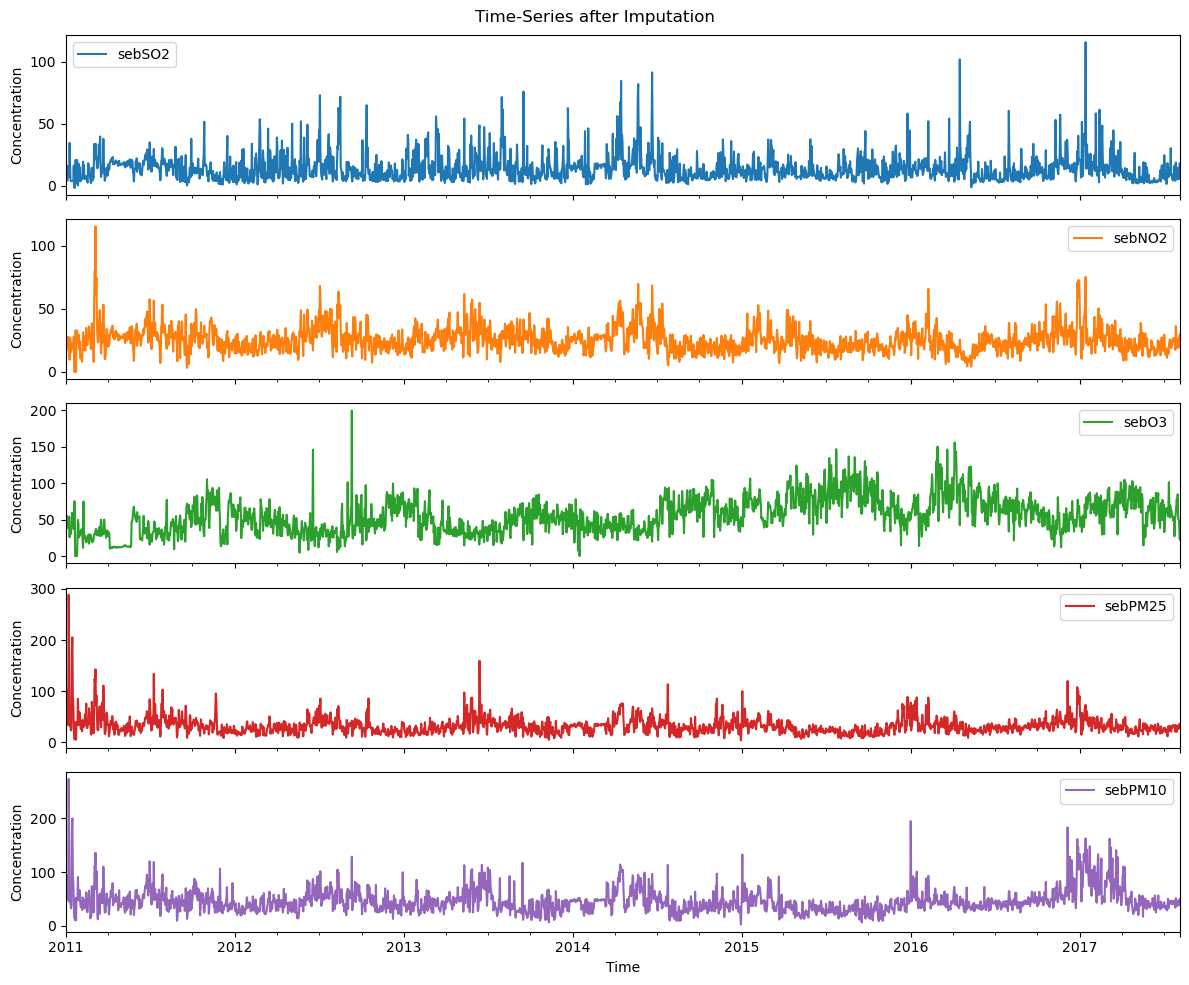

In [30]:
#Plot after imputation
data_imputed.plot(subplots=True, figsize=(12,10), title="Time-Series after Imputation", ylabel="Concentration")
plt.xlabel("Time")
plt.tight_layout()
plt.savefig("after_imputation.png")
plt.show()

In [31]:
data_imputed.describe()

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000
mean,13.997828,25.547520,55.631861,31.826846,46.181893
std,10.658141,9.895108,23.941968,17.256416,22.531673
min,-1.639424,0.000000,0.000000,3.634714,2.460333
25%,6.838309,19.173572,37.734417,21.276133,32.062847
50%,11.683453,24.299078,53.783500,29.186167,42.902042
75%,17.304524,29.960855,70.785583,37.111542,52.795652
max,115.727693,115.438737,199.584250,288.647042,273.435889


In [32]:
data_imputed_matrix=data_imputed.corr()
data_imputed_matrix

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
sebSO2,1.000000,0.571134,-0.276202,0.308208,0.326806
sebNO2,0.571134,1.000000,-0.320086,0.590184,0.539585
sebO3,-0.276202,-0.320086,1.000000,-0.180308,-0.112578
sebPM25,0.308208,0.590184,-0.180308,1.000000,0.767559
sebPM10,0.326806,0.539585,-0.112578,0.767559,1.000000


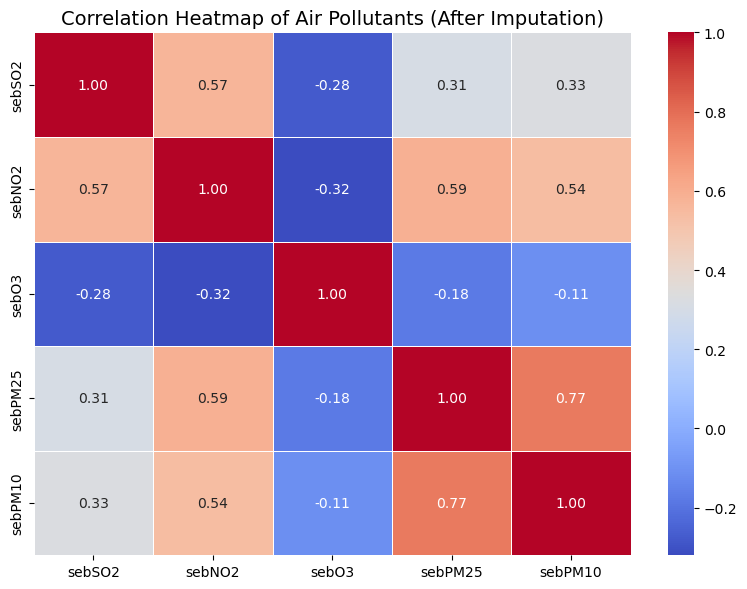

In [33]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_imputed_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Pollutants (After Imputation)", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)  # Save image for report
plt.show()

In [34]:
data_imputed.columns

Index(['sebSO2', 'sebNO2', 'sebO3', 'sebPM25', 'sebPM10'], dtype='object')

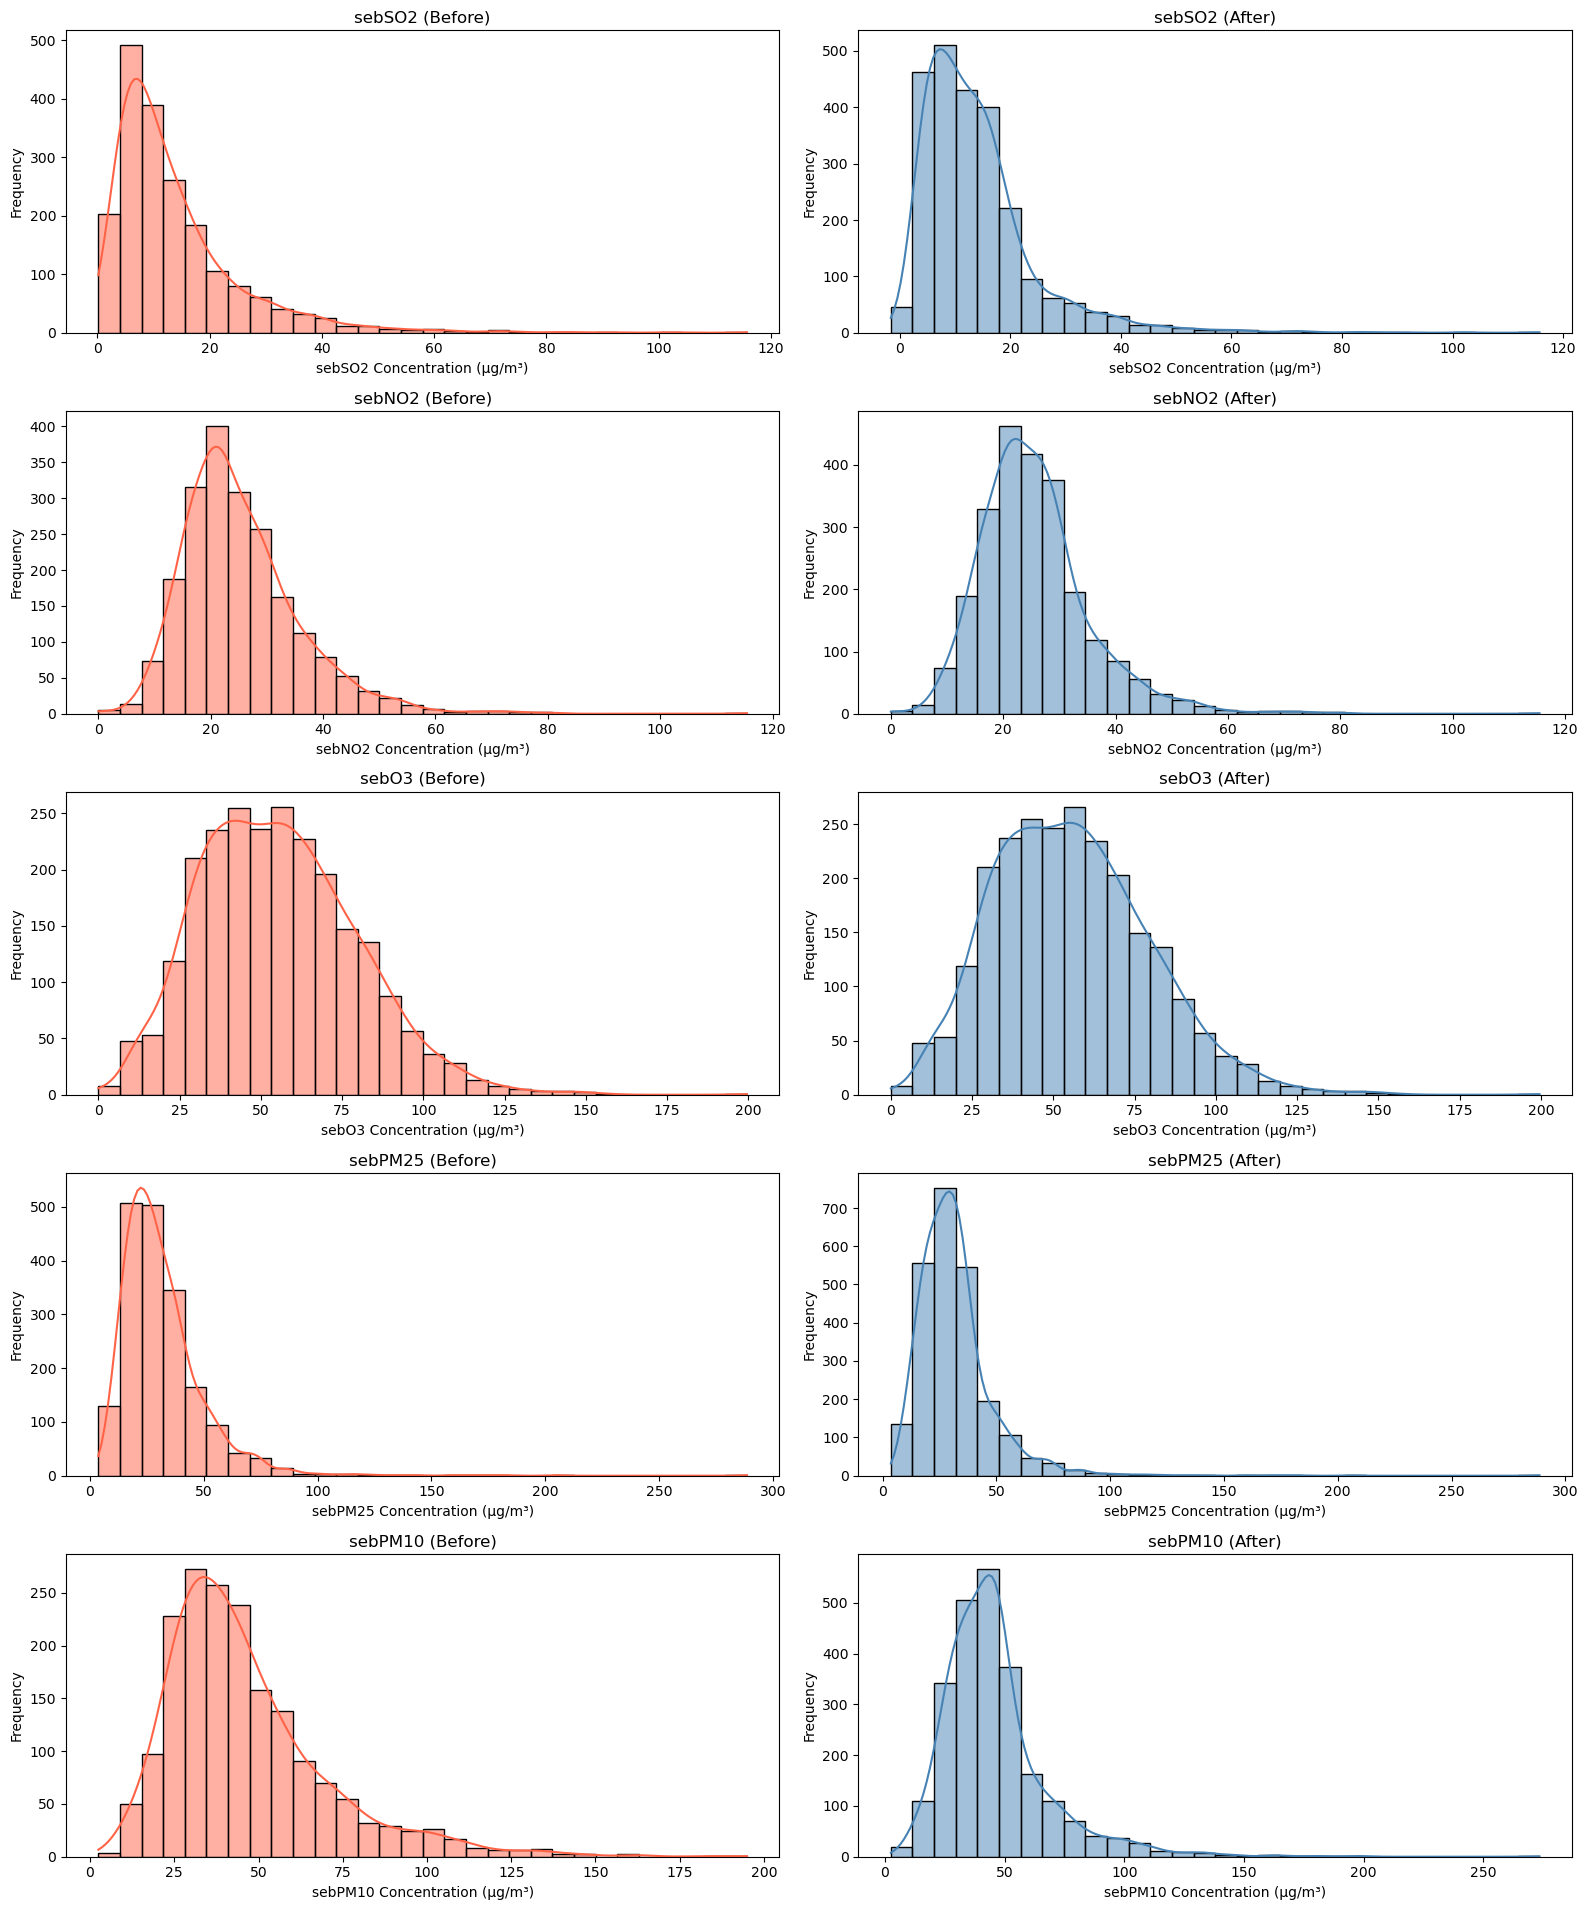

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pollutant features
features = ['sebSO2', 'sebNO2', 'sebO3', 'sebPM25', 'sebPM10']

# Set up figure with rows = pollutants, cols = 2 (before vs after)
fig, axes = plt.subplots(len(features), 2, figsize=(16, 20))
#fig.suptitle("Distribution of Air Pollutants Before vs After Imputation", fontsize=16, y=0.92)

for i, col in enumerate(features):
    # Before Imputation
    sns.histplot(data_clean[col].dropna(), kde=True, bins=30, color="tomato", ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} (Before)")
    axes[i, 0].set_xlabel(f"{col} Concentration (µg/m³)")
    axes[i, 0].set_ylabel("Frequency")

    # After Imputation
    sns.histplot(data_imputed[col].dropna(), kde=True, bins=30, color="steelblue", ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} (After)")
    axes[i, 1].set_xlabel(f"{col} Concentration (µg/m³)")
    axes[i, 1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leaves space for suptitle
plt.show()


In [39]:
#Scaling the data
#standardizing the data usually helps find higher-quality clusters
scaler= StandardScaler()
scaled_data= scaler.fit_transform(data_imputed)

#View first 5 rows of scaled dataFrame
print(scaled_data[:5])


[[ 0.02699044  0.03116477 -0.09829392  0.01741847  0.01081617]
 [-0.11638356 -0.50094538 -0.25864192  2.27093783  1.48415935]
 [ 0.1329824  -0.05049754 -0.01564292  1.44021922  0.29935575]
 [-0.93446293 -0.71196835 -0.36914729  4.09646163  2.06388795]
 [ 0.19975702  0.2306584  -0.72744549  0.1289263   0.08006178]]


In [40]:
#Initialize kmeans parameters
kmeans_kwarg= {'init':'random','n_init':10, 'random_state':1}

#Create list to hold SSE values for each k
SSE= []
for k in range(1,11):
    kmeans= KMeans (n_clusters=k)
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

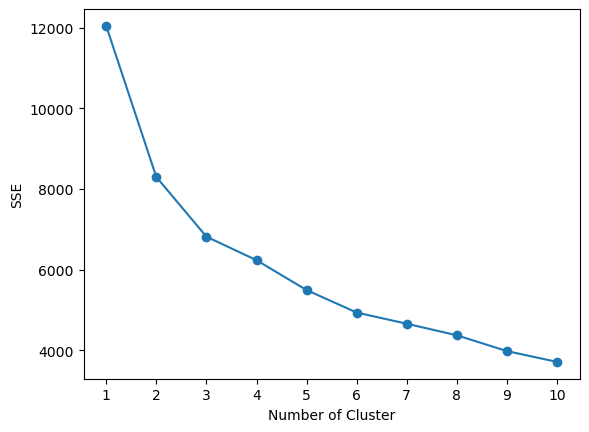

In [41]:
#Visualize results
plt.plot(range(1,11), SSE, marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

Highest silhouette score at k = 2 with score = 0.34988452412804133


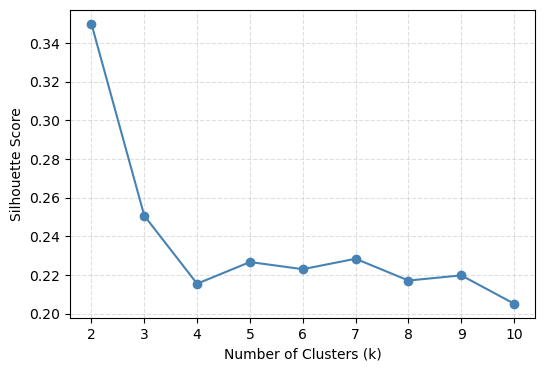

In [42]:
# Compute silhouette scores for k=2 to k=10
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Print best k
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print("Highest silhouette score at k =", best_k, "with score =", max(silhouette_scores))

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', color='steelblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
#plt.title("Silhouette Method for Optimal k")
plt.grid(alpha=0.4, linestyle='--')
plt.show()

In [43]:
# K-means with k=2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  
labels = kmeans.fit_predict(scaled_data) 

In [44]:
centroids = kmeans.cluster_centers_
# inverse transform to original pollutant units

centroids_original = scaler.inverse_transform(centroids)
print(pd.DataFrame(centroids_original, columns=features))

      sebSO2     sebNO2      sebO3    sebPM25    sebPM10
0  22.596906  35.693059  40.962397  47.794972  67.381556
1  10.496918  21.417006  61.604184  25.325804  37.550955


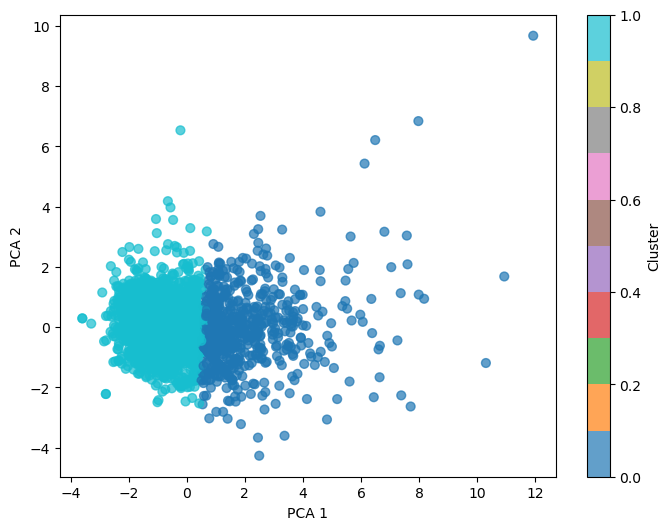

In [45]:
# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(scaled_data)

# Plot PCA scatter with clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_data[:,0], pca_data[:,1], 
    c=labels, cmap="tab10", alpha=0.7, s=40
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
#plt.title("PCA Scatter Plot of K-means Clusters (k=3)")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [46]:
#Export clustering results to excel
with pd.ExcelWriter("airpollution_clustered.xlsx") as writer:
    data.to_excel(writer, sheet_name="data_with_clusters", index=False)
    pd.DataFrame(centroids_original, columns=features).to_excel(writer, sheet_name="centroids", index=False)